In [1]:
#Import libraries

#pandas digunakan untuk memanipulasi dan analisis data
#seaborn digunakan visualisasi data
#matplotlib digunakan untuk menyetel atau mengatur visualisasi data

import pandas as pd
import seaborn as sns 
import numpy as np
from datetime import datetime
import re
import datetime

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

NameError: name 'matplotlib' is not defined

In [7]:
df = pd.read_csv('/kaggle/input/moviesdataset/New Movie.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,13/06/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,02/07/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20/06/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,02/07/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,25/07/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


**Membaca tipe data**

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

The set has:
* Numerical columns: Budget, Gross, Runtime, Score and Votes.
* Categorical columns: Company, Country, Director, Genre, Name, Rating, Star, Released and Writer.
* Integer: Year.


# **Cleaning Data**

**There are unnamed column. We have to change the 'Released' and 'Year' column into date data types.**

In [ ]:
df['released'] = pd.to_datetime(df['released'])


In [ ]:
df.dtypes

## Check Typo

In [ ]:
for col_name in ['company', 'genre', 'country']:
    print(df[col_name].value_counts(), '')

# # **Let's check if there are 'missing value' in our data.**
Missing value is when our data is inclue '0' or null data. 

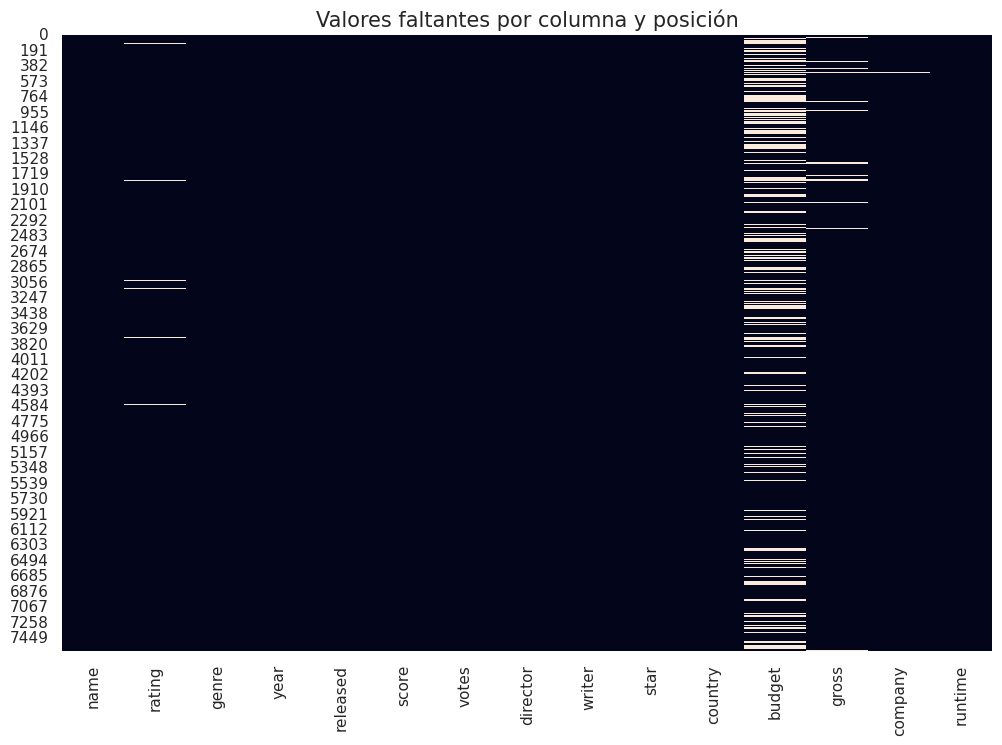

In [38]:
sns.heatmap(df.isnull(), cbar=False) 
plt.title('Valores faltantes por columna y posición', fontsize = 15)
plt.show()

There are still have 'missing value' in our data. To fix this, replace the missing value with 0

In [43]:
df = df.fillna(0)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-02-07,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-02-07,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


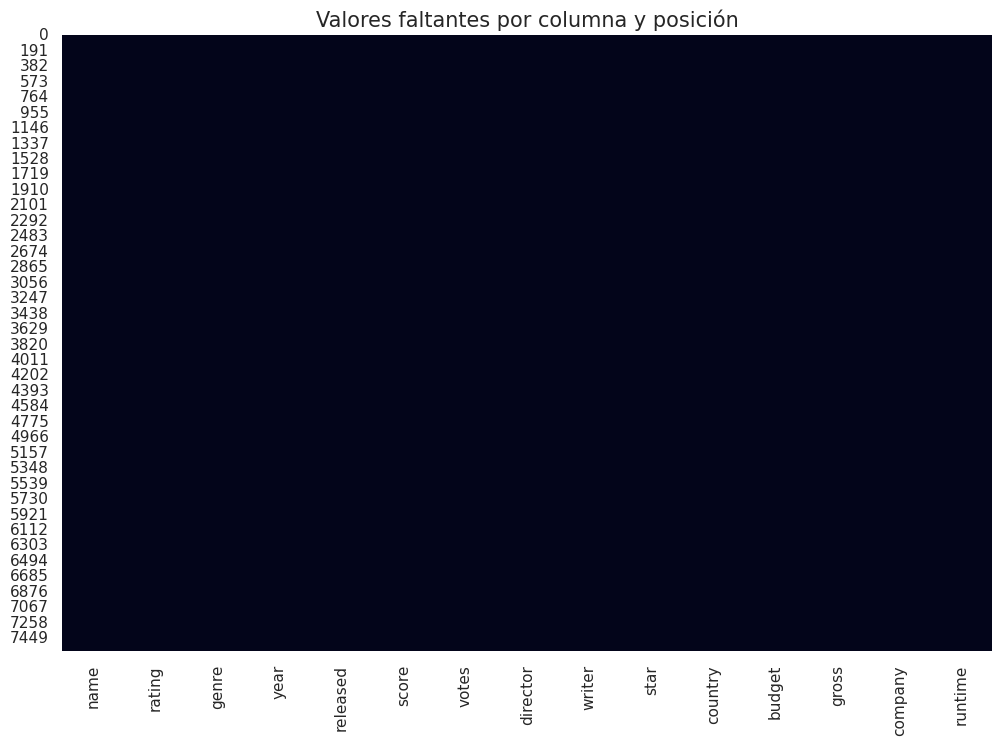

In [45]:
#Check the missing value again

sns.heatmap(df.isnull(), cbar=False) 
plt.title('Valores faltantes por columna y posición', fontsize = 15)
plt.show()

We are done to fix the missing value. 

# 1. EDA Visualization

We should understanding the basic information of the data. Let's check it first

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7612.0,2.000489e+03,1.113923e+01,1980.0,1991.00,2.001000e+03,2.010000e+03,2.020000e+03
score,7612.0,6.389920e+00,9.680426e-01,1.9,5.80,6.500000e+00,7.100000e+00,9.300000e+00
votes,7612.0,8.868297e+04,1.637435e+05,7.0,9300.00,3.300000e+04,9.400000e+04,2.400000e+06
budget,7612.0,3.567303e+07,3.520245e+07,3000.0,14000000.00,3.567303e+07,3.567303e+07,3.560000e+08
gross,7612.0,7.897999e+07,1.641596e+08,309.0,4872940.75,2.161091e+07,7.897999e+07,2.847246e+09
runtime,7612.0,1.072853e+02,1.861546e+01,55.0,95.00,1.040000e+02,1.160000e+02,3.660000e+02


#NOTE

df.describe() is a pandas method that returns a summary of the statistics of a DataFrame. The T attribute transposes the DataFrame, so that the rows become columns and the columns become rows.

The resulting transposed DataFrame will have the following columns:

* count: the number of non-missing (non-NaN) values in each column
* mean: the arithmetic mean (average) of each column
* std: the standard deviation of each column
* min: the minimum value of each column
* 25%: the 25th percentile (1st quartile) of each column
* 50%: the 50th percentile (median) of each column
* 75%: the 75th percentile (3rd quartile) of each column
* max: the maximum value of each column

condlusion: 
* we have 7612 titles of films
* the studied time lapse goes from 1986 to 2016


### How many films released per year?

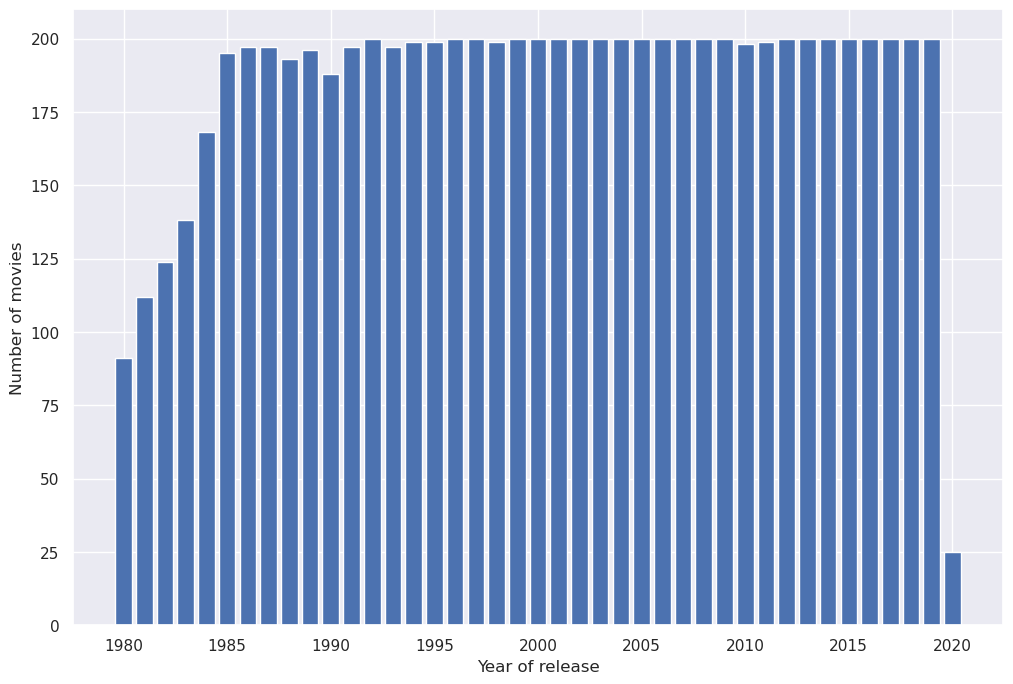

In [84]:
counts = df['year'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Year of release')
plt.ylabel('Number of movies')
plt.show()


### What is the oldest and the newest movie?

In [94]:
Oldest = df.sort_values('released', ascending = True)

#specify the column we want to show
Oldest[['name', 'released']] [:10]



,name,released
65,Fatso,1980-01-02
29,American Gigolo,1980-01-02
27,Raise the Titanic,1980-01-08
22,The Final Countdown,1980-01-08
74,Just Tell Me What You Want,1980-01-18
80,Windows,1980-01-18
1,The Blue Lagoon,1980-02-07
3,Airplane!,1980-02-07
20,Cruising,1980-02-15
41,Breaker Morant,1980-03-07


In [99]:
Newest = df.sort_values("released", ascending = False)

#specify the column we want to show
Newest[['name', "released"]][:10]

,name,released
7588,Wonder Woman 1984,2020-12-25
7607,More to Life,2020-10-23
7606,The Robinsons,2020-10-11
7406,1917,2020-10-01
7601,Leap,2020-09-25
7596,The Eight Hundred,2020-08-28
7611,Tee em el,2020-08-19
7598,Star Trek First Frontier,2020-08-09
7602,Black Wall Street Burning,2020-07-02
7589,Birds of Prey,2020-07-02


### What country most released films?

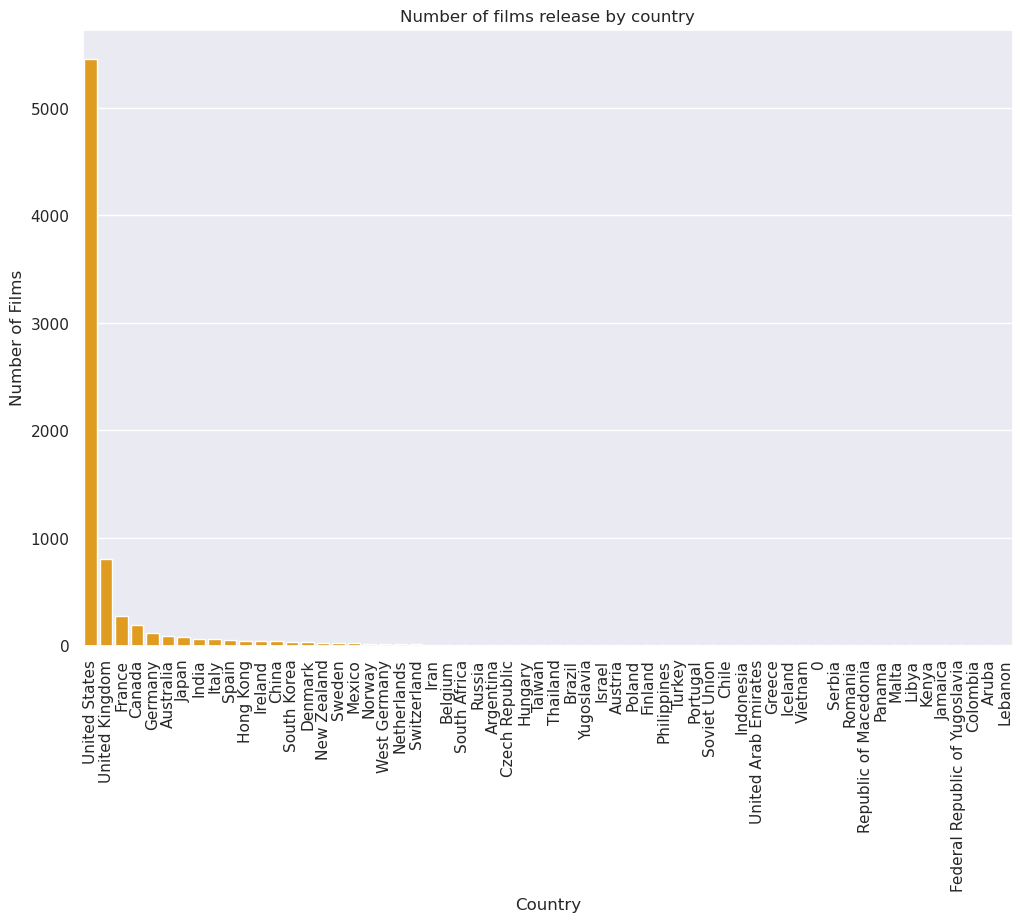

In [104]:
country = df.groupby('country')['name'].count()
country = country.sort_values(ascending = False)

sns.barplot(x = country.index, y = country.values, color = 'orange')
plt.title('Number of films release by country')
plt.ylabel('Number of Films')
plt.xlabel('Country')

plt.xticks(rotation = 90)
plt.show()

In [110]:
#create a code data for shorting the data

country = df.groupby('country')['name'].count()
country = country.sort_values(ascending = False)
top10 = country.head(10)

top10

country
United States     5454
United Kingdom     804
France             271
Canada             188
Germany            117
Australia           91
Japan               80
India               62
Italy               60
Spain               47
Name: name, dtype: int64

Let's check just 10 countires

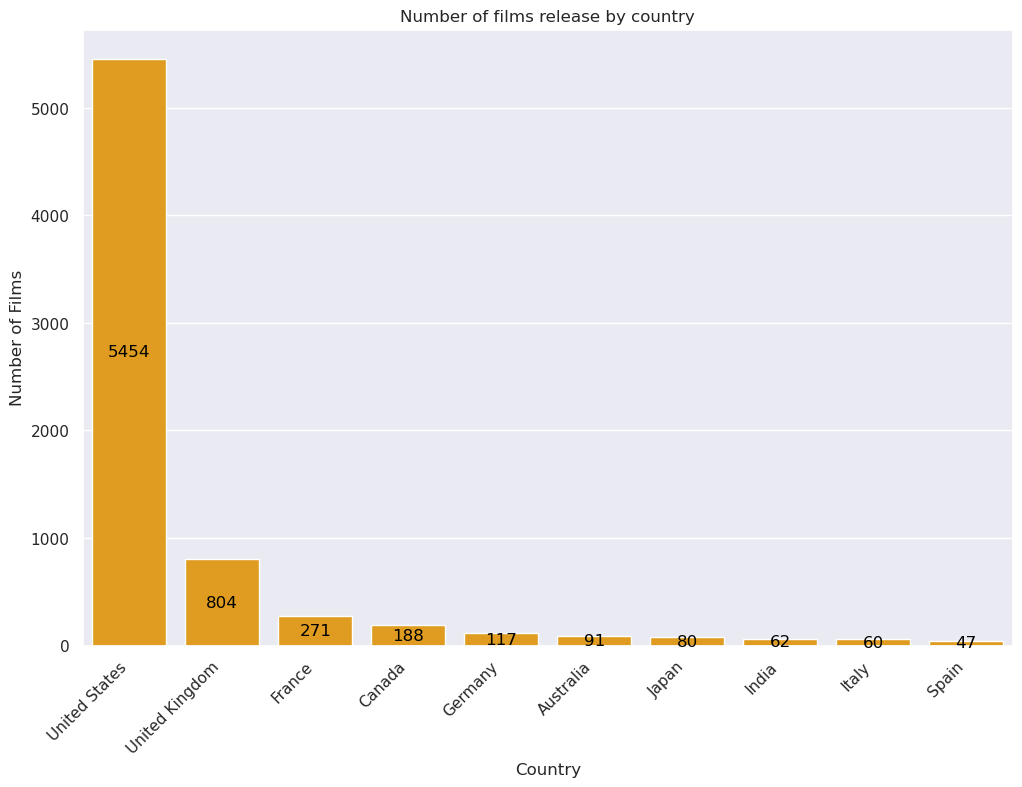

In [14]:
#create a code data for shorting the data

country = df.groupby('country')['name'].count()
country = country.sort_values(ascending = False)
top10 = country.head(10)

sns.barplot(x = top10.index, y = top10.values, color = 'orange')
plt.title('Number of films release by country')
plt.ylabel('Number of Films')
plt.xlabel('Country')

plt.xticks(rotation = 45, ha = 'right')

for i, count in enumerate(top10.values):
    plt.text(i, count/2, count, ha='center', va='center', color='black', fontweight='medium')


plt.show()

In [135]:
#change data type 'company' to string
df['company'] = df['company'].astype(str)

#drop any duplication
df['company'].drop_duplicates().sort_values(ascending=False)



7073                                thefyzz
2993                                    nan
5611                            micro_scope
6356               iDeal Partners Film Fund
3954                               i5 Films
                       ...                 
3695                     1+2 Seisaku Iinkai
455                                       0
2972                        .406 Production
7469    "Weathering With You" Film Partners
4292        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2363, dtype: object

In [134]:
#normalize the similar company but has different name 

df['company_normalized'] = df['company'].str.lower().replace(r'\W+', '', regex=True)
unique_companies = df['company_normalized'].drop_duplicates().count()
print("Number of unique companies: ", unique_companies)

Number of unique companies:  2358


### Top 10 company most released film

In [6]:
#create a code data for shorting the data

companies = df.groupby('company')['name'].count()
companies = companies.sort_values(ascending = False)
top10 = companies.head(10)

top10

company
Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        239
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    124
Walt Disney Pictures         123
TriStar Pictures              93
Name: name, dtype: int64

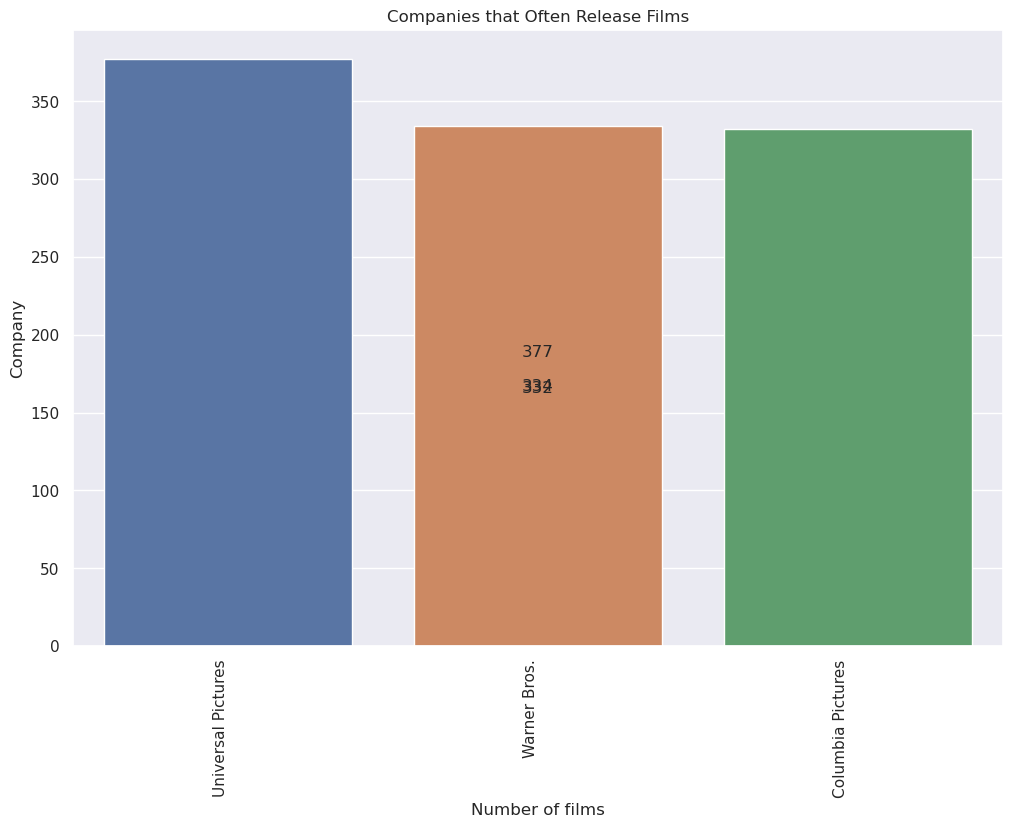

In [18]:
companies = df.groupby('company')['name'].count()
companies = companies.sort_values(ascending = False)
top3 = companies.head(3)

sns.barplot(x = top3.index, y = top3.values)
plt.title('Companies that Often Release Films')
plt.xlabel('Number of films')
plt.ylabel('Company')
plt.xticks(rotation = 90, ha = 'right')

for i, count in enumerate(top3.values):
    plt.text(1, count/2, count, ha = 'center', va = 'center', fontweight = 'medium')
plt.show()


# 2. Find the Correlation of the Parameter

I want to check the parameter that affect the gross. 

In [52]:
#Sort the 'gross' from the descending value

df = df.sort_values(['gross'], ascending=False)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5392,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,2.370000e+08,2.847246e+09,Twentieth Century Fox,162.0
7389,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.560000e+08,2.797501e+09,Marvel Studios,181.0
2993,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,2.000000e+08,2.201647e+09,Twentieth Century Fox,194.0
6607,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,2.450000e+08,2.069522e+09,Lucasfilm,138.0
7188,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.210000e+08,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,"Love, Honor and Obey",R,Comedy,2000,2001-09-02,6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,3.567303e+07,1.400000e+03,British Broadcasting Corporation (BBC),103.0
7569,The Untold Story,0,Comedy,2019,2019-11-01,5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,3.567303e+07,7.900000e+02,Visual Arts Entertainment,104.0
7524,Run with the Hunted,Not Rated,Crime,2019,2020-06-26,5.2,735.0,John Swab,John Swab,Ron Perlman,United States,3.567303e+07,6.820000e+02,Roxwell Films,93.0
2368,Madadayo,0,Drama,1993,1993-04-17,7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,1.190000e+07,5.960000e+02,DENTSU Music And Entertainment,134.0


From above data, maybe we can say that parameter that can affect the increasing value of gross are:
* budget
* company

Now let's have a look our hypotesis by visualisation all the parameter 

# Check Correlation Gross and Budget

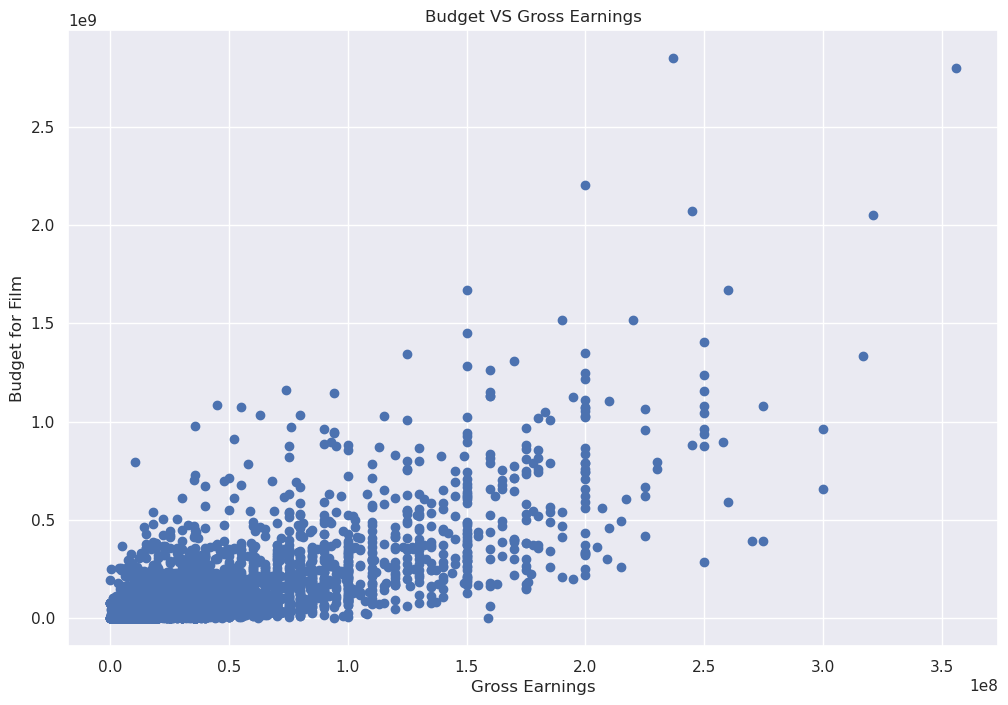

In [48]:
#check the correlation parameter with visualisation
#Set the 'budget' as x axis and
# the 'gross' as y axis

plt.scatter( x = df['budget'], y = df['gross'])

plt.title('Budget VS Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

It's seems difficult to analisys the correlation from the picture. is the budget really affect the gross? 
So we need the regression function to show the linear regression equation and check our hypothesis with it. 

<AxesSubplot:xlabel='budget', ylabel='gross'>

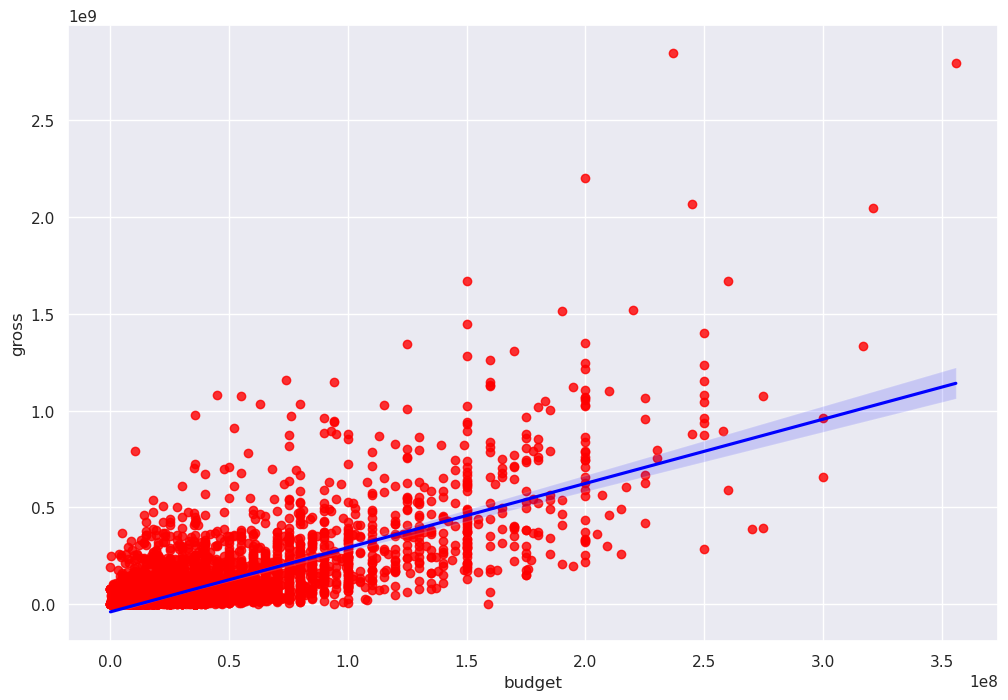

In [124]:

df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce')
df['gross'] = pd.to_numeric(df['gross'], errors = 'coerce')
df = df.dropna()

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color' : 'red'}, line_kws = {'color' : 'blue'})


By the picture, we can know that budget is affect the increasing value of gross. So our hypothesis is correct. 

But we need to know the value and check again if there any parameter that most affect than the budget for the gross.

In [54]:
#corr is formula to show the linear correlation in 2 variabel by column 
# 1 mean positive correlation
# -1 mean negative correlation

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099727,0.220139,0.264894,0.250397,0.120373
score,0.099727,1.000000,0.411541,0.064368,0.184415,0.400150
votes,0.220139,0.411541,1.000000,0.420578,0.628263,0.309216
budget,0.264894,0.064368,0.420578,1.000000,0.711338,0.265204
gross,0.250397,0.184415,0.628263,0.711338,1.000000,0.241588
runtime,0.120373,0.400150,0.309216,0.265204,0.241588,1.000000


from the column, we can see that budget is true correlated to affect increasing the gross (0.7)

Now we visualising correlation the parameter to each other. Every cell indicated how srong the correlation of two parameters. 

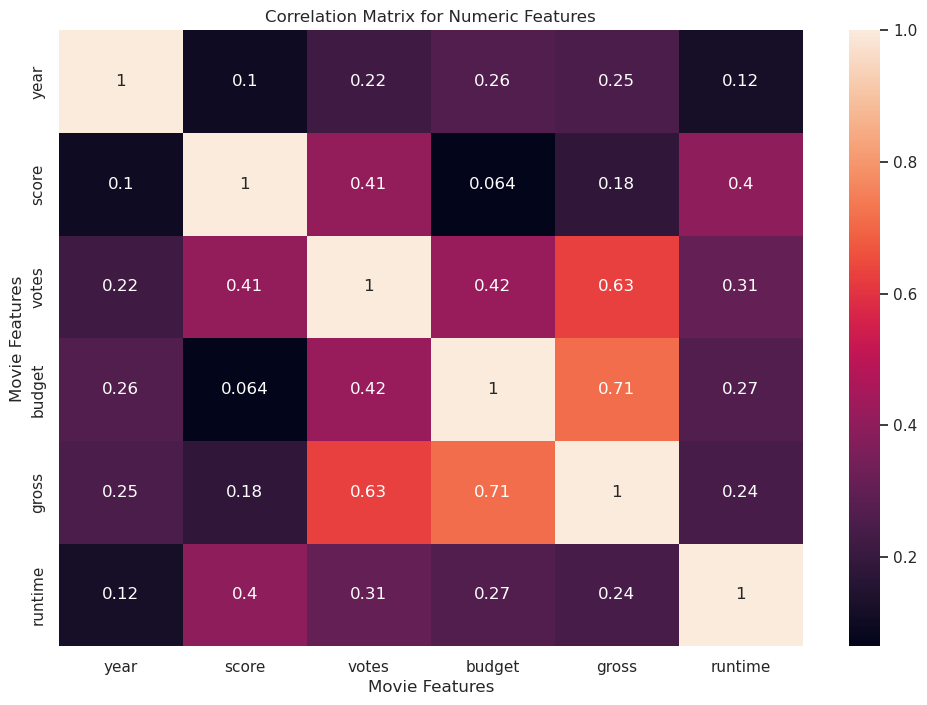

In [55]:
#Visualising correlation the parameter to each other

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

# Check Correlation Gross VS Company

In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5392,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7389,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
2993,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6607,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7188,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


The company column has a string data type. It's difficult to do if we want to sort or visualising it. 

So we must to change the data type from string into numeric. 

In [57]:

df_numerized = df.copy()

for col_name in df.select_dtypes(include = ['object']).columns: 
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5392,532,6,0,2009,2009-12-18,7.8,1100000.0,1148,1769,2308,56,2.370000e+08,2.847246e+09,2231,162.0
7389,534,6,0,2019,2019-04-26,8.4,903000.0,162,738,2215,56,3.560000e+08,2.797501e+09,1590,181.0
2993,6844,6,6,1997,1997-12-19,7.8,1100000.0,1148,1769,1575,56,2.000000e+08,2.201647e+09,2231,194.0
6607,5107,6,0,2015,2015-12-18,7.8,876000.0,1119,2540,517,56,2.450000e+08,2.069522e+09,1524,138.0
7188,535,6,0,2018,2018-04-27,8.4,897000.0,162,738,2215,56,3.210000e+08,2.048360e+09,1590,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,3339,7,4,2000,2001-09-02,6.5,5200.0,728,1117,2293,55,3.567303e+07,1.400000e+03,476,103.0
7569,6670,0,4,2019,2019-11-01,5.7,320.0,2537,2555,1894,56,3.567303e+07,7.900000e+02,2286,104.0
7524,4632,4,5,2019,2020-06-26,5.2,735.0,1438,2194,2252,56,3.567303e+07,6.820000e+02,1972,93.0
2368,3384,0,6,1993,1993-04-17,7.3,5100.0,33,1709,2536,28,1.190000e+07,5.960000e+02,790,134.0


Then we do the same thing as budget affect gross to this parameter

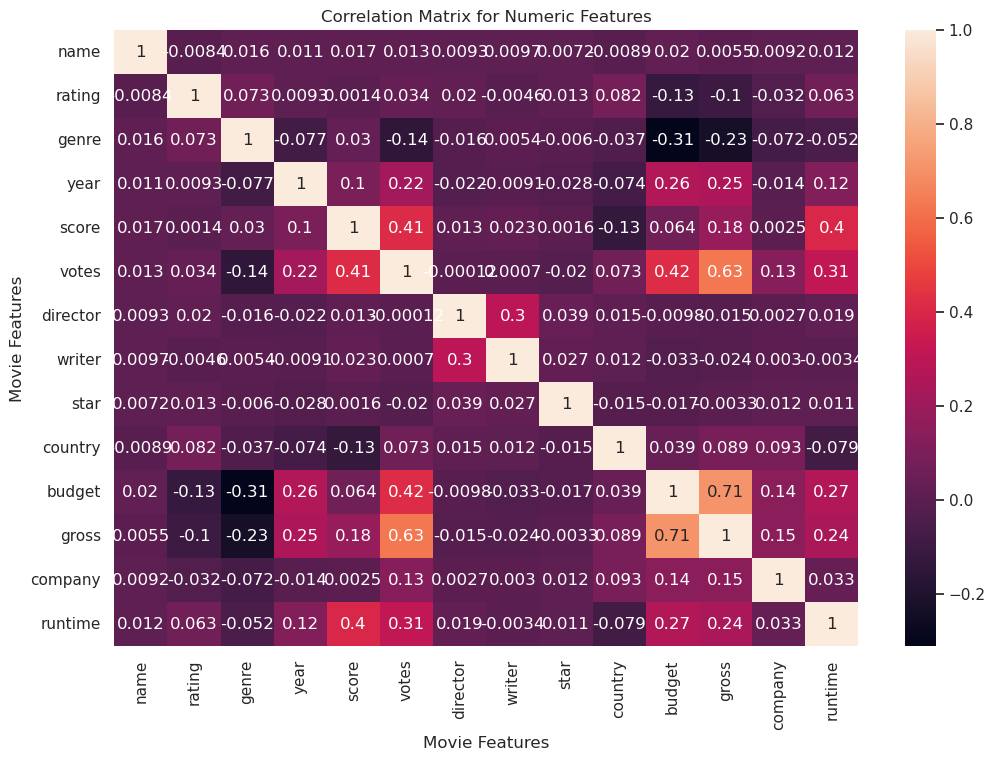

In [63]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

By the pictures, we can simply coclude that gross is high correlated with:
* budget (0.71)
* votes (0.63)

Okey, let's check them again without visualisation


In [68]:
#short the correlation
sorted_pairs = corr_pairs.sort_values()

sorted_pairs


genre    budget    -0.310727
budget   genre     -0.310727
genre    gross     -0.229942
gross    genre     -0.229942
genre    votes     -0.143777
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64

In [76]:
#short correlation with condition the value <0.5 and not equal 1
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1)]

high_corr 

gross   votes     0.628263
votes   gross     0.628263
budget  gross     0.711338
gross   budget    0.711338
dtype: float64